In [1]:
import numpy as np
from typing import List
from services.TSP import TSP
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
def generate_metric_graph(N: int) -> List[List[float]]:
    points = np.random.uniform(1, 30, (N, 2))
    graph = [[0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            graph[i][j] = np.linalg.norm(points[i]-points[j])
    return graph

In [3]:
def moving_average(arr, k):
    return np.mean(arr.reshape(-1, k), axis=1)

In [4]:
max_nodes = 110
max_experiments = 10

cost_greedy_l = [[] for _ in range(max_experiments)]
cost_greedy_iter_l = [[] for _ in range(max_experiments)]
cost_approx_l = [[] for _ in range(max_experiments)]
cost_approx_iter_l = [[] for _ in range(max_experiments)]
cost_perfect_l = [[] for _ in range(max_experiments)]


time_greedy_l = [[] for _ in range(max_experiments)]
time_greedy_iter_l = [[] for _ in range(max_experiments)]
time_approx_l = [[] for _ in range(max_experiments)]
time_approx_iter_l = [[] for _ in range(max_experiments)]
time_perfect_l = [[] for _ in range(max_experiments)]

pb = tqdm(range(max_experiments * max_nodes))

for exp in tqdm(range(max_experiments)):
    for node in tqdm(range(3, max_nodes+1)):
        pb.update()
        graph = generate_metric_graph(node)
        node_weights = [1 for _ in range(node)]
        tsp = TSP(graph, node_weights)
        
        path_1, cost_greedy, time_greedy = tsp.shortest_distance_first_combination()
        cost_greedy_l[exp].append(cost_greedy)
        time_greedy_l[exp].append(time_greedy)

        _, cost_greedy_iter, time_greedy_iter = tsp.two_edge_switch(2, path_1)
        cost_greedy_iter_l[exp].append(cost_greedy_iter)
        time_greedy_iter_l[exp].append(time_greedy_iter + time_greedy)

        try: 
            path_2, cost_approx, time_approx = tsp.approximation_1_5()
            cost_approx_l[exp].append(cost_approx)
            time_approx_l[exp].append(time_approx)
            _, cost_approx_iter, time_approx_iter = tsp.two_edge_switch(2, path_2)
            cost_approx_iter_l[exp].append(cost_approx_iter)
            time_approx_iter_l[exp].append(time_approx_iter + time_approx)
        except: pass
        
        if node<=13:
            _, cost_perfect, time_perfect = tsp.perfect()
            cost_perfect_l[exp].append(cost_perfect)
            time_perfect_l[exp].append(time_perfect)

  0%|          | 0/1100 [00:00<?, ?it/s]

  5%|▌         | 57/1100 [00:03<01:48,  9.62it/s]

100%|██████████| 108/108 [00:23<00:00,  4.54it/s]

 15%|█▌        | 165/1100 [00:27<01:36,  9.66it/s]

100%|██████████| 108/108 [00:23<00:00,  4.56it/s]

 25%|██▍       | 273/1100 [00:51<01:26,  9.57it/s]

100%|██████████| 108/108 [00:23<00:00,  4.57it/s]

 31%|███       | 337/1100 [01:12<02:35,  4.90it/s]

100%|██████████| 108/108 [00:23<00:00,  4.58it/s]

 44%|████▍     | 489/1100 [01:38<01:03,  9.58it/s]

100%|██████████| 108/108 [00:23<00:00,  4.57it/s]

100%|██████████| 108/108 [00:23<00:00,  4.55it/s]

 64%|██████▍   | 704/1100 [02:26<00:45,  8.69it/s]

100%|██████████| 108/108 [00:24<00:00,  4.46it/s]

 70%|███████   | 773/1100 [02:47<00:41,  7.79it/s]

 74%|███████▍  | 813/1100 [02:50<00:30,  9.52it/s]

100%|██████████| 108/108 [00:23<00:00,  4.55it/s]

 84%|████████▎ | 920/1100 [03:13<00:18,  9.94it/s]

100%|██████████| 108/108 [00:24<00:00,  4.49it/s]

 90%|█████████ | 993/1100 [03:35

In [5]:
cost_greedy_n = np.array(cost_greedy_l)
cost_greedy_iter_n = np.array(cost_greedy_iter_l)
cost_approx_n = np.array(cost_approx_l)
cost_approx_iter_n = np.array(cost_approx_iter_l)

time_greedy_n = np.array(time_greedy_l)
time_greedy_iter_n = np.array(time_greedy_iter_l)
time_approx_n = np.array(time_approx_l)
time_approx_iter_n = np.array(time_approx_iter_l)

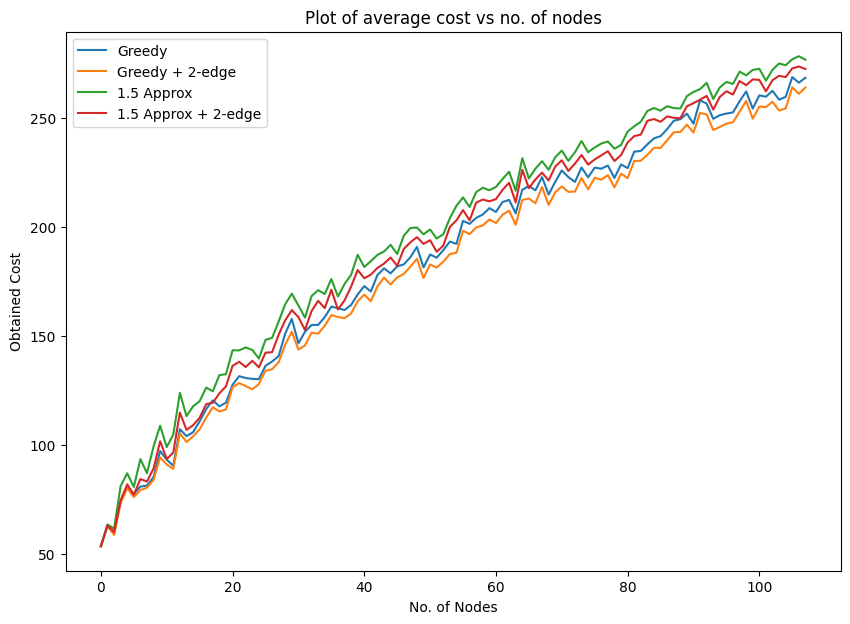

In [6]:
plt.figure(figsize=(10, 7))
plt.title("Plot of average cost vs no. of nodes")
plt.plot(cost_greedy_n.mean(axis=0))
plt.plot(cost_greedy_iter_n.mean(axis=0))
plt.plot(cost_approx_n.mean(axis=0))
plt.plot(cost_approx_iter_n.mean(axis=0))
plt.legend(["Greedy", "Greedy + 2-edge", "1.5 Approx", "1.5 Approx + 2-edge"])
plt.xlabel("No. of Nodes")
plt.ylabel("Obtained Cost")
plt.savefig("cost.png")
plt.show()

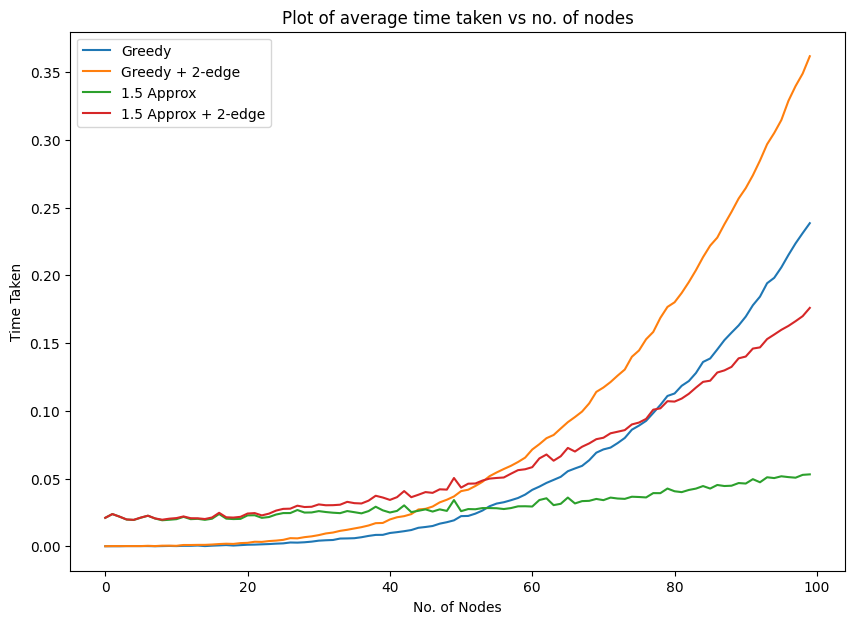

In [25]:
plt.figure(figsize=(10, 7))
plt.title("Plot of average time taken vs no. of nodes")
plt.plot(time_greedy_n.mean(axis=0))
plt.plot(time_greedy_iter_n.mean(axis=0))
plt.plot(time_approx_n.mean(axis=0))
plt.plot(time_approx_iter_n.mean(axis=0))
plt.legend(["Greedy", "Greedy + 2-edge", "1.5 Approx", "1.5 Approx + 2-edge"])
plt.xlabel("No. of Nodes")
plt.ylabel("Time Taken (ms)")
plt.savefig("time.png")
plt.show()

C:\Users\Shashank\AppData\Local\Temp\ipykernel_18836\2557717909.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.divide(cost_greedy_n, cost_greedy_iter_n)[1:].mean(axis=0))
C:\Users\Shashank\AppData\Local\Temp\ipykernel_18836\2557717909.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.divide(cost_greedy_iter_n, cost_greedy_iter_n)[1:].mean(axis=0))
C:\Users\Shashank\AppData\Local\Temp\ipykernel_18836\2557717909.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.divide(cost_approx_n, cost_greedy_iter_n)[1:].mean(axis=0))
C:\Users\Shashank\AppData\Local\Temp\ipykernel_18836\2557717909.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.divide(cost_approx_iter_n, cost_greedy_iter_n)[1:].mean(axis=0))


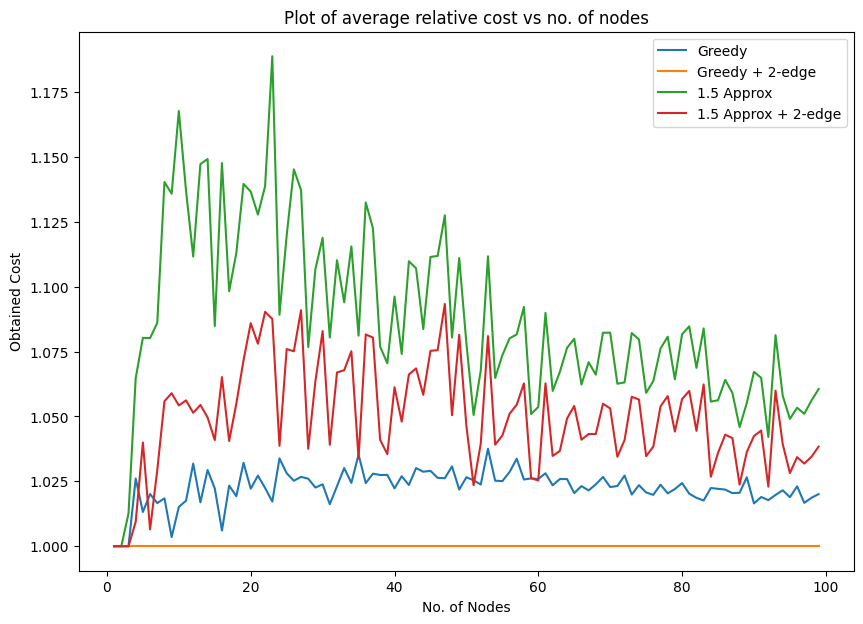

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Plot of average relative cost vs no. of nodes")
plt.plot(np.divide(cost_greedy_n, cost_greedy_iter_n)[1:].mean(axis=0))
plt.plot(np.divide(cost_greedy_iter_n, cost_greedy_iter_n)[1:].mean(axis=0))
plt.plot(np.divide(cost_approx_n, cost_greedy_iter_n)[1:].mean(axis=0))
plt.plot(np.divide(cost_approx_iter_n, cost_greedy_iter_n)[1:].mean(axis=0))
plt.legend(["Greedy", "Greedy + 2-edge", "1.5 Approx", "1.5 Approx + 2-edge"])
plt.xlabel("No. of Nodes")
plt.ylabel("Obtained Cost")
plt.savefig("cost.png")
plt.show()